   
  At the end of the experiment:
    
  * Understand various types of gradient descent approaches (Stochastic, Mini-Batch Gradient Descent) and there differences.


In [ ]:
# Import the required Packages
import pandas as pd
import numpy as np
import scipy.stats as stat
%matplotlib notebook
from  matplotlib import pyplot as plt
import random
import time


### Read the data

In [ ]:
# Load the data by using pandas read_csv()
data = pd.read_csv("AIML_DS_REGR01_SIMPLEPENDULUMOSCILLATIONDATA.txt", sep=" ", header=None, names=['l', 't'])
# Print the first 5 rows of dataframe 'data'
print(data.head())
# Print the last 5 rows of dataframe 'data'
print(data.tail())

      l        t
0  0.10  0.69004
1  0.11  0.69497
2  0.12  0.74252
3  0.13  0.75360
4  0.14  0.83568
       l       t
85  0.95  1.9841
86  0.96  2.0066
87  0.97  2.0493
88  0.98  2.0503
89  0.99  2.0214


In [ ]:
# Get the length and time period values from the dataset
l = data['l'].values
t = data['t'].values
# Get the square of time period
tsq = t * t

In [ ]:
l,t,tsq

(array([0.1 , 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ,
        0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31,
        0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42,
        0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53,
        0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64,
        0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75,
        0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86,
        0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97,
        0.98, 0.99]),
 array([0.69004, 0.69497, 0.74252, 0.7536 , 0.83568, 0.86789, 0.84182,
        0.85379, 0.85762, 0.8839 , 0.89985, 0.98436, 1.0244 , 1.0572 ,
        0.99077, 1.0058 , 1.0727 , 1.0943 , 1.1432 , 1.1045 , 1.1867 ,
        1.1385 , 1.2245 , 1.2406 , 1.2071 , 1.2658 , 1.2995 , 1.3142 ,
        1.2663 , 1.2578 , 1.2991 , 1.3058 , 1.3478 , 1.3506 , 1.4044 ,
        1.3948 , 1.38   , 1.448

**Stochastic gradient descent (Single sample)**

Instead of computing the sum of all gradients, stochastic gradient descent selects an observation uniformly at random.

In [ ]:
"""
The function 'next_step' updates the values of m and c and calculates error. 
The loss is minimized due to the changed values of m and c.
The new values m, c and the minimized loss is returned.
"""
def next_step(x, y, m, c, eta):
    ycalc = m * x + c
    error = (y - ycalc) ** 2
    delta_m = -(y - ycalc) * x
    delta_c = -(y - ycalc)
    m = m - delta_m * eta
    c = c - delta_c * eta
    return m, c, error

"""
The function below takes a random index and at that index idx, we calculate the values of m,c and error.
We use one data point at a time x[idx],y[idx]
Here we call the funtion 'next_step' to which we pass a data point x[idx],y[idx]
"""
def one_loop_random(x, y, m, c, eta):
    # Making random idx
    random_idx = np.arange(len(y))
    np.random.shuffle(random_idx)
    # Training with random idx
    for idx in random_idx:
        m, c, e = next_step(x[idx], y[idx], m, c, eta)
        #print(m, c, e)
    return m,c,e
  
"""
The function below trains the data for 1000 iterations. 
In each iteration it calls the 'one_loop_random' function.
"""
def train_stochastic(x, y, m, c, eta, iterations=1000):
    for iteration in range(iterations):
        m, c, err = one_loop_random(x, y, m, c, eta)
    return m, c, err

## TRAIN

In [ ]:
# Init m, c
m, c = 0, 0

In [ ]:
# Learning rate
lr = 0.001

m = 2.20134 c = 1.18748 Error = 0.133497
m = 2.92055 c = 0.775305 Error = 0.0367542
m = 3.37275 c = 0.514963 Error = 0.0751655
m = 3.65761 c = 0.35146 Error = 0.0268932
m = 3.83695 c = 0.248597 Error = 0.00329262
m = 3.94981 c = 0.183764 Error = 0.00368349
m = 4.02084 c = 0.14295 Error = 0.000791788
m = 4.06554 c = 0.117254 Error = 0.00644139
m = 4.09366 c = 0.101044 Error = 0.00285304
m = 4.11142 c = 0.0909112 Error = 0.00567067


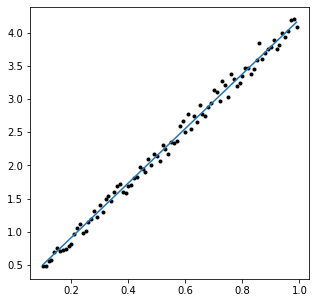

In [ ]:
# Training for 1000 iterations, plotting after every 100 iterations:
%matplotlib inline
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
plt.ion()
fig.show()
fig.canvas.draw()

# Call the train_stochastic() method to update m and c and get error value with lr = 0.001.
for num in range(10):
    m, c, error = train_stochastic(l, tsq, m, c, lr, iterations=100) # We will plot the error values for every 100 iterations
    print("m = {0:.6} c = {1:.6} Error = {2:.6}".format(m, c, error))
    y = m * l + c
    ax.clear()
    ax.plot(l, tsq, '.k')
    ax.plot(l, y)
    fig.canvas.draw()
    time.sleep(1)

m = 2.2012 c = 1.18797 Error = 0.247939
m = 2.92014 c = 0.775046 Error = 8.0902e-05
m = 3.37289 c = 0.515463 Error = 0.0379435
m = 3.65758 c = 0.351547 Error = 0.0168455
m = 3.83696 c = 0.24869 Error = 0.000369146
m = 3.94976 c = 0.183746 Error = 0.00673379
m = 4.02075 c = 0.14287 Error = 0.00724451
m = 4.0655 c = 0.11723 Error = 0.00826657
m = 4.09365 c = 0.101083 Error = 0.00277215
m = 4.11138 c = 0.0909038 Error = 0.013257
m = 4.12257 c = 0.0845675 Error = 0.0121961
m = 4.1296 c = 0.0805279 Error = 0.0197662
m = 4.13395 c = 0.0778791 Error = 0.00601807
m = 4.13671 c = 0.0762354 Error = 0.0170502
m = 4.13856 c = 0.0753971 Error = 0.00404257
m = 4.13958 c = 0.0746187 Error = 0.0131667
m = 4.14029 c = 0.0742261 Error = 0.00152779
m = 4.14071 c = 0.0739547 Error = 0.0050791
m = 4.14098 c = 0.0737955 Error = 0.00582783
m = 4.14121 c = 0.0737891 Error = 0.00445639
m = 4.14124 c = 0.0736158 Error = 0.00443767
m = 4.1413 c = 0.0735289 Error = 3.38592e-05
m = 4.14143 c = 0.0736437 Error = 3.

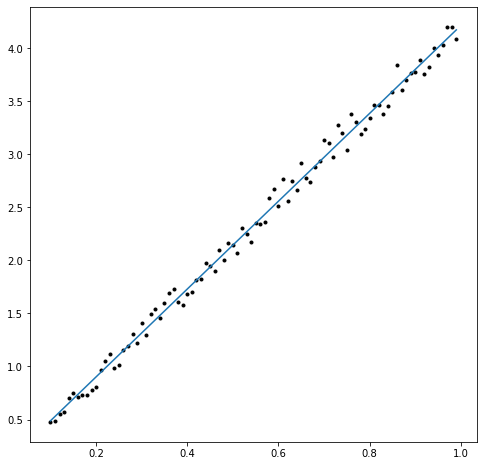

In [ ]:

%matplotlib inline
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
plt.ion()
fig.show()
fig.canvas.draw()

ms, cs,errs = [], [], []
m, c = 0, 0
lr = 0.001

# Call the train_stochastic() method to update m and c and get error value with lr = 0.001.
for times in range(100):
    m, c, error = train_stochastic(l, tsq, m, c, lr, iterations=100) # We will plot the error values for every 100 iterations
    print("m = {0:.6} c = {1:.6} Error = {2:.6}".format(m, c, error))
    y = m * l + c
    ax.clear()
    ax.plot(l, tsq, '.k')
    ax.plot(l, y)
    fig.canvas.draw()
    time.sleep(1)

    ms.append(m)
    cs.append(c)
    errs.append(error)


In [ ]:
"""
The function 'train_one_batch' updates the values of m and c and calculates error. 
The loss is minimized due to the changed values of m and c.
The new values m, c and the minimized loss is returned.
"""
def train_one_batch(x, y, m, c, eta):
    const = - 2.0/len(y)
    ycalc = m * x + c
    delta_m = const * sum(x * (y - ycalc))
    delta_c = const * sum(y - ycalc)
    m = m - delta_m * eta
    c = c - delta_c * eta
    error = sum((y - ycalc)**2)/len(y)
    return m, c, error

"""
The function below takes a batch_size and loss is calculated w.r.t batches.
The batches are created using random index.
The m, c and error values are calculated for each batch of data.
So, it calls the function 'train_one_batch' by passing batch_x, batch_y for each batch.
"""
def train_batches(x, y, m, c, eta, batch_size):
    # Making the batches
    random_idx = np.arange(len(y))
    np.random.shuffle(random_idx)
    
    # Train each batch
    for batch in range(len(y)//batch_size):
        batch_idx = random_idx[batch*batch_size:(batch+1)*batch_size]
        batch_x = x[batch_idx]
        batch_y = y[batch_idx]
        m, c, err = train_one_batch(batch_x, batch_y, m, c, eta)
    
    return m, c, err

"""
The function below trains the data for 1000 iterations. 
The data is traversed in batches, the batch size here is considered to be 10.
In each iteration it calls the 'train_batches' function. 
The 'batch_size' is passed as a parameter to 'train_batches'.
"""
def train_minibatch(x, y, m, c, eta, batch_size=10, iterations=1000):
    for iteration in range(iterations):
        m, c, err = train_batches(x, y, m, c, eta, batch_size)
    return m, c, err


#### TRAIN

In [ ]:
# Init m, c
m, c = 0, 0

In [ ]:
# Learning rate
lr = 0.001

In [ ]:
# Batch size
batch_size = 10

m = 0.276529 c = 0.408341 Error = 4.1726
m = 0.49608 c = 0.718257 Error = 2.71618
m = 0.671759 c = 0.952549 Error = 1.8504
m = 0.813639 c = 1.12874 Error = 1.33379
m = 0.929467 c = 1.26031 Error = 1.02365
m = 1.0252 c = 1.35762 Error = 0.835624
m = 1.10541 c = 1.42863 Error = 0.719865
m = 1.17362 c = 1.47945 Error = 0.646911
m = 1.23254 c = 1.51479 Error = 0.599347
m = 1.28426 c = 1.53828 Error = 0.566879


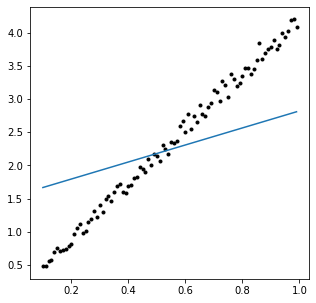

In [ ]:
%matplotlib inline
# Training for 1000 iterations, plotting after every 100 iterations:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
plt.ion()
fig.show()
fig.canvas.draw()

# Call the train_minibatch() method to update m and c and get error value with lr = 0.001 and batch_size=90.
for num in range(10):
    m, c, error = train_minibatch(l, tsq, m, c, lr, batch_size=90, iterations=100) # We will plot the error values for every 100 iterations
    print("m = {0:.6} c = {1:.6} Error = {2:.6}".format(m, c, error))
    y = m * l + c
    ax.clear()
    ax.plot(l, tsq, '.k')
    ax.plot(l, y)
    fig.canvas.draw()
    time.sleep(1)

In [ ]:

m, c = 0, 0
lr = 0.01

In [ ]:

batch_size = 100


#### Plotting error vs iterations

m = 2.92171 c = 0.775156 Error = 0.141375
m = 3.65874 c = 0.351623 Error = 0.00567054
m = 3.95016 c = 0.18331 Error = 0.00449905
m = 4.0657 c = 0.11696 Error = 0.00544148
m = 4.11152 c = 0.0908541 Error = 0.0108884
m = 4.12949 c = 0.0802432 Error = 0.00467716
m = 4.13662 c = 0.0760367 Error = 0.00476538
m = 4.13953 c = 0.0745507 Error = 0.00476735
m = 4.14055 c = 0.0737023 Error = 0.00973204
m = 4.14108 c = 0.0736083 Error = 0.00724689
m = 4.14139 c = 0.0737458 Error = 0.0121471
m = 4.14152 c = 0.0737596 Error = 0.0066189
m = 4.14147 c = 0.0736437 Error = 0.00753235
m = 4.14156 c = 0.0738389 Error = 0.00831356
m = 4.1415 c = 0.0736751 Error = 0.00379294
m = 4.14149 c = 0.0735993 Error = 0.00916948
m = 4.14138 c = 0.0734084 Error = 0.00230219
m = 4.14163 c = 0.0738367 Error = 0.0084795
m = 4.14158 c = 0.0737538 Error = 0.00964731
m = 4.14142 c = 0.0735017 Error = 0.00903187
m = 4.14136 c = 0.0733649 Error = 0.00642578
m = 4.14144 c = 0.0734815 Error = 0.00500183
m = 4.14137 c = 0.073406

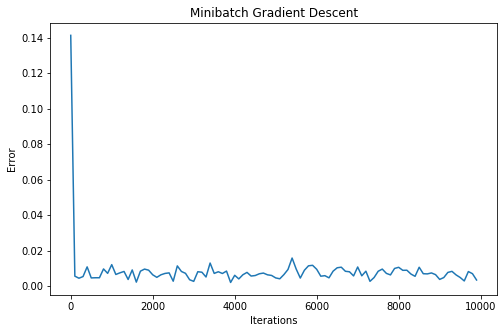

In [ ]:
%matplotlib inline

ms, cs,errs = [], [], []
m, c = 0, 0
lr = 0.010
batch_size = 10

# Call the train_minibatch() method to update m and c and get error value with lr = 0.001 and batch_size = 10.
for times in range(100):
    m, c, error = train_minibatch(l, tsq, m, c, lr, batch_size, iterations=100) # We will plot the error values for every 100 iterations
    print("m = {0:.6} c = {1:.6} Error = {2:.6}".format(m, c, error))
    y = m * l + c
    ax.clear()
    ax.plot(l, tsq, '.k')
    ax.plot(l, y)
    fig.canvas.draw()
    time.sleep(1)

    ms.append(m)
    cs.append(c)
    
    errs.append(error)
    
# plot Errors vs Iterations
epoch = range(0, 10000, 100)
plt.figure(figsize=(8, 5))
plt.plot(epoch, errs)
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.title("Minibatch Gradient Descent")
plt.show()